## **Conditional Probablity**




**Task is to calculate the probability a student gets an A (80%+) in math, given they miss 10 or more classes.**

## **Steps:**
- Importing Libraries
- Uploading  dataset
- Preprocessing data 
- Building pivot table
- Probablity Calculation

- Conclusion


## **Importing required Libraries**

In [0]:
import pandas as pd
import numpy as np

## **Uploading Dataset**

The data set contains attributes related to mathematics subject and students we are only concerned with absences and final score that is G3

In [0]:
data=pd.read_csv('/content/student-mat.csv')

In [3]:
#Display the top 5 rows and column
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## **Preprocessing data**


1.   The first task to  convert the column *G3* from (1-20) to (1-100) range so we need to   multiply it by 5.
2.   If marks are greater than equal to 80 in column *G3* replace it with 1 else with 0
3.   If the number of absence is greater than or equal to 10 in column *absences* replace it with 1 else with 0








In [0]:
# Multiplying 'G3' column data with 5
data['G3']=5*data["G3"]


In [5]:
#Checking if values in column  has converted or not by unique method
data['G3'].unique()

array([ 30,  50,  75,  55,  95,  45,  60,  70,  80,  25,  40,  85,  90,
        65, 100,  35,   0,  20])

In [0]:
# Replacing values of column G3 with 1 or 0
def Grade(marks):
    
    if(int(marks) >= 80 ):
      return 1
    else:
      return 0
        
   
data.G3 = data.G3.apply(Grade) 
    

In [7]:
#Checking if values in column has converted or not by unique method
data['G3'].unique()

array([0, 1])

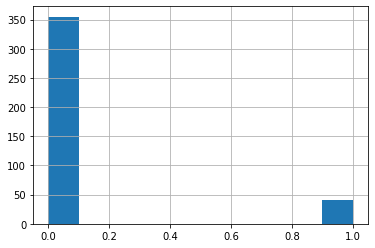

In [8]:
# Plotting the histogram of column G3
data['G3'].hist()

In [0]:
# Replacing values of column 'absences' with 1 or 0
def absence(number):
    
    if(int(number) >= 10 ):
      return 1
    else:
      return 0
        
   
data.absences = data.absences.apply(absence) 

In [10]:
#Checking if values in column has converted or not by unique method

data['absences'].unique()

array([0, 1])

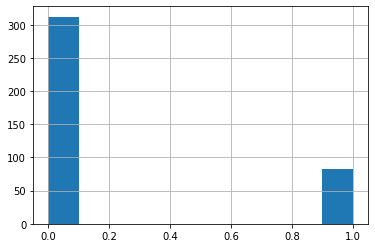

In [11]:
# Plotting the histogram of column 'absences'
data['absences'].hist()

## **Building pivot table**

**What is pivot table ?**

A pivot table is a data summarization tool that is used in the context of data processing. Pivot tables are used to summarize, sort, reorganize, group, count, total or average data stored in a database. It allows its users to transform columns into rows and rows into columns.

**Pivot table in context with problem statment**

Our problem statment is to calculate the probability a student gets an A (80%+) in math, given they miss 10 or more classes.

So we have to count the values of intersection of cases like



1.    Number of student with absence = 0 (miss less than 10 class) and G3=0 ( Grade is less than 80 percent )

2.   Number of student with absence = 0 (miss less than 10 class) and G3=1 (Grade greater than or equal to 80 percent )

3.  Number of student with absence = 1 (miss 10 or more classes) and G3=0 (Grade is less than 80 percent)

4.   Number of student with absence = 1 (miss 10 or more classes) and G3=1(Grade greater than or equal to 80 percent)





In [0]:
# Add one more column to make building a pivot table easier.
data['count'] = 1

In [13]:
# We only require 'G3', 'absences' and 'count column' so updating data frame
data = data[['G3','absences','count']]
data.head()

,G3,absences,count
0,0,0,1
1,0,0,1
2,0,1,1
3,0,0,1
4,0,0,1


In [14]:
# Building pivot table using pandas pivot_table method 
pd.pivot_table(
    data, 
    values='count', 
    index=['G3'], 
    columns=['absences'], 
    aggfunc=np.size, 
    fill_value=0
)

absences,0,1
G3,,
0,277,78
1,35,5


We can conclude from pivot table that -

When absences is 1
( miss 10 or more class ) and G3 is 1 ( marks greater than or equal to 80 percent ) the total count is 5 and like wise we will be able to use the pivot table for calculating probablity.


## **Probablity Calculation**

**Defining probablity terms**



1.   P(A) is the probability of a grade of 80% or greater.
2.   P(B) is the probability of missing 10 or more classes.
3.   P(A|B) is the probability of a 80%+ grade, given missing 10 or more classes. 
4.   P(A ∩ B) is probablity of A and B to occur simultaneously or intersection of probablity of A and B.

**What is Conditional Probablity**

Conditional probability is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion or evidence) occurred. If the event of interest is A and the event B is known or assumed to have occurred, "the conditional probability of A given B", or "the probability of A under the condition B", is usually written as P(A | B), or sometimes PB(A) or P(A / B). 


 *P(A|B) = P(A ∩ B) / P(B)*

 Our task is to calculate P(A|B) 




In [0]:
'Calculating probablity PA , PB and P(A∩B) where P(A∩B) is denoted by PA_and_PB with the help of pivot table'

PA = (35 + 5) / (35 + 5 + 277 + 78) 
PB = (78 + 5) / (35 + 5 + 277 + 78) 
PA_and_PB = 5 / (35 + 5 + 277 + 78) 

In [0]:
'Calculating conditional probablity denoted by P_Conditional'

P_Conditional = PA_and_PB / PB

In [17]:
#Printing the probablity in percentage
P_Conditional=P_Conditional*100
print(P_Conditional,"%")

6.024096385542169 %



## **Conclusion**

We have succesfully calculated the probablity of a student gets an A (80%+) in math, given they miss 10 or more classes and it comes out to be 0.06 or 6 % approx.